<a href="https://colab.research.google.com/github/seemantobarman/reconstruction_of_blurred_images/blob/main/thesis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf "/content/sample_data"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
 !mkdir ~/.kaggle
 !pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seemantobarman","key":"e09f5d2750c833d5e3f77c13e0c5a5e2"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d starktony45/image-dataset

100% 12.5G/12.5G [05:04<00:00, 48.3MB/s]
100% 12.5G/12.5G [05:04<00:00, 44.0MB/s]


In [ ]:
!unzip "/content/image-dataset.zip" -d "/content/datasets"

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/train2014/COCO_train2014_000000547307.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547308.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547315.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547318.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547348.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547351.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547352.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547363.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547367.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547369.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547378.jpg  
  inflating: /content/datasets/train2014/COCO_train2014_000000547387.jpg  
  inflating: /content/datasets/train2014/COCO_tra

In [ ]:
!rm "/content/image-dataset.zip"

In [ ]:
!mkdir "input"
!mkdir "outputs"

In [ ]:
!mkdir "/content/input/sharp"
!mkdir "/content/input/gaussian_blurred"

In [ ]:
%cd "/content/datasets/train2014"
%ls
!find . -maxdepth 1 -type f | head -5000 | xargs cp -t "/content/input/sharp"

Streaming output truncated to the last 5000 lines.
COCO_train2014_000000256648.jpg  COCO_train2014_000000547308.jpg
COCO_train2014_000000256651.jpg  COCO_train2014_000000547315.jpg
COCO_train2014_000000256655.jpg  COCO_train2014_000000547318.jpg
COCO_train2014_000000256659.jpg  COCO_train2014_000000547348.jpg
COCO_train2014_000000256662.jpg  COCO_train2014_000000547351.jpg
COCO_train2014_000000256664.jpg  COCO_train2014_000000547352.jpg
COCO_train2014_000000256683.jpg  COCO_train2014_000000547363.jpg
COCO_train2014_000000256690.jpg  COCO_train2014_000000547367.jpg
COCO_train2014_000000256706.jpg  COCO_train2014_000000547369.jpg
COCO_train2014_000000256707.jpg  COCO_train2014_000000547378.jpg
COCO_train2014_000000256720.jpg  COCO_train2014_000000547387.jpg
COCO_train2014_000000256721.jpg  COCO_train2014_000000547388.jpg
COCO_train2014_000000256731.jpg  COCO_train2014_000000547391.jpg
COCO_train2014_000000256734.jpg  COCO_train2014_000000547411.jpg
COCO_train2014_000000256741.jpg  COCO_t

In [ ]:
import cv2
import os
from tqdm import tqdm

#Defining all the folders
source_directory = '/content/input/sharp'

#It will give all the images names in an array
images = os.listdir(source_directory)

destination_directory = '/content/input/gaussian_blurred'

#Adding gaussian blur to the sharp images
for i, img in tqdm(enumerate(images), total=len(images)):

    img = cv2.imread("{}/{}".format(source_directory,images[i]), cv2.IMREAD_COLOR)

    blur = cv2.GaussianBlur(img, (31, 31), 0)
    cv2.imwrite("{}/{}".format(destination_directory,images[i]), blur)

print('Added Gaussian Blur Successfully')

100%|██████████| 5000/5000 [01:55<00:00, 43.29it/s]

Added Gaussian Blur Successfully


In [ ]:
!rm -rf "/content/datasets"

We are using: cuda:0
Train data size: 3500
Validation data size: 1500


  0%|          | 0/3500 [00:00<?, ?it/s]

DeblurCNN(
  (conv1): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(32, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)
Epoch 1 of 50


  0%|          | 6/1500 [00:00<00:29, 50.97it/s]


Train Loss: 0.00724


  0%|          | 4/3500 [00:00<01:31, 38.25it/s]


Val Loss: 0.00400
Epoch 2 of 50


  0%|          | 6/1500 [00:00<00:29, 51.03it/s]


Train Loss: 0.00376


  0%|          | 4/3500 [00:00<01:31, 38.33it/s]


Val Loss: 0.00341
Epoch 3 of 50


  0%|          | 6/1500 [00:00<00:29, 49.93it/s]


Train Loss: 0.00325


  0%|          | 4/3500 [00:00<01:38, 35.45it/s]


Val Loss: 0.00307
Epoch 4 of 50


  0%|          | 6/1500 [00:00<00:28, 52.68it/s]


Train Loss: 0.00303


  0%|          | 4/3500 [00:00<01:31, 38.31it/s]


Val Loss: 0.00290
Epoch 5 of 50


  0%|          | 6/1500 [00:00<00:28, 52.03it/s]


Train Loss: 0.00289


  0%|          | 4/3500 [00:00<01:42, 34.18it/s]


Val Loss: 0.00278
Epoch 6 of 50


  0%|          | 6/1500 [00:00<00:28, 51.54it/s]


Train Loss: 0.00274


  0%|          | 4/3500 [00:00<01:29, 39.26it/s]


Val Loss: 0.00266
Epoch 7 of 50


  0%|          | 6/1500 [00:00<00:28, 52.63it/s]


Train Loss: 0.00265


  0%|          | 4/3500 [00:00<01:30, 38.61it/s]


Val Loss: 0.00258
Epoch 8 of 50


  0%|          | 6/1500 [00:00<00:29, 51.27it/s]


Train Loss: 0.00260


  0%|          | 4/3500 [00:00<01:33, 37.28it/s]


Val Loss: 0.00253
Epoch 9 of 50


  0%|          | 6/1500 [00:00<00:28, 51.83it/s]


Train Loss: 0.00256


  0%|          | 5/3500 [00:00<01:26, 40.31it/s]


Val Loss: 0.00251
Epoch 10 of 50


  0%|          | 5/1500 [00:00<00:30, 48.41it/s]


Train Loss: 0.00254


  0%|          | 4/3500 [00:00<01:33, 37.57it/s]


Val Loss: 0.00244
Epoch 11 of 50


  0%|          | 6/1500 [00:00<00:28, 53.34it/s]


Train Loss: 0.00247


  0%|          | 4/3500 [00:00<01:34, 37.13it/s]


Val Loss: 0.00245
Epoch 12 of 50


  0%|          | 6/1500 [00:00<00:28, 52.73it/s]


Train Loss: 0.00245


  0%|          | 4/3500 [00:00<01:32, 37.95it/s]


Val Loss: 0.00240
Epoch 13 of 50


  0%|          | 6/1500 [00:00<00:29, 50.99it/s]


Train Loss: 0.00243


  0%|          | 4/3500 [00:00<01:31, 38.17it/s]


Val Loss: 0.00239
Epoch 14 of 50


  0%|          | 6/1500 [00:00<00:29, 50.92it/s]


Train Loss: 0.00241


  0%|          | 4/3500 [00:00<01:28, 39.44it/s]


Val Loss: 0.00275
Epoch 15 of 50


  0%|          | 6/1500 [00:00<00:30, 49.69it/s]


Train Loss: 0.00240


  0%|          | 4/3500 [00:00<01:32, 37.81it/s]


Val Loss: 0.00246
Epoch 16 of 50


  0%|          | 6/1500 [00:00<00:28, 52.14it/s]


Train Loss: 0.00237


  0%|          | 4/3500 [00:00<01:38, 35.51it/s]


Val Loss: 0.00233
Epoch 17 of 50


  0%|          | 6/1500 [00:00<00:28, 52.19it/s]


Train Loss: 0.00236


  0%|          | 4/3500 [00:00<01:34, 36.86it/s]


Val Loss: 0.00232
Epoch 18 of 50


  0%|          | 6/1500 [00:00<00:28, 51.83it/s]


Train Loss: 0.00236


  0%|          | 4/3500 [00:00<01:33, 37.28it/s]


Val Loss: 0.00240
Epoch 19 of 50


  0%|          | 6/1500 [00:00<00:30, 49.15it/s]


Train Loss: 0.00234


  0%|          | 4/3500 [00:00<01:34, 37.09it/s]


Val Loss: 0.00230
Epoch 20 of 50


  0%|          | 6/1500 [00:00<00:28, 52.80it/s]


Train Loss: 0.00234


  0%|          | 5/3500 [00:00<01:30, 38.79it/s]


Val Loss: 0.00246
Epoch 21 of 50


  0%|          | 6/1500 [00:00<00:28, 52.12it/s]


Train Loss: 0.00232


  0%|          | 4/3500 [00:00<01:36, 36.21it/s]


Val Loss: 0.00229
Epoch 22 of 50


  0%|          | 6/1500 [00:00<00:28, 52.01it/s]


Train Loss: 0.00231


  0%|          | 4/3500 [00:00<01:27, 39.88it/s]


Val Loss: 0.00229
Epoch 23 of 50


  0%|          | 6/1500 [00:00<00:28, 51.52it/s]


Train Loss: 0.00232


  0%|          | 4/3500 [00:00<01:33, 37.31it/s]


Val Loss: 0.00234
Epoch 24 of 50


  0%|          | 6/1500 [00:00<00:28, 51.71it/s]


Train Loss: 0.00231


  0%|          | 4/3500 [00:00<01:31, 38.31it/s]


Val Loss: 0.00230
Epoch 25 of 50


  0%|          | 6/1500 [00:00<00:29, 50.82it/s]


Train Loss: 0.00229


  0%|          | 4/3500 [00:00<01:29, 39.12it/s]


Val Loss: 0.00229
Epoch 26 of 50


  0%|          | 6/1500 [00:00<00:29, 50.66it/s]


Train Loss: 0.00229


  0%|          | 4/3500 [00:00<01:29, 38.91it/s]


Val Loss: 0.00225
Epoch 27 of 50


  0%|          | 6/1500 [00:00<00:29, 51.24it/s]


Train Loss: 0.00228


  0%|          | 4/3500 [00:00<01:37, 35.73it/s]


Val Loss: 0.00228
Epoch 28 of 50


  0%|          | 6/1500 [00:00<00:29, 50.63it/s]


Train Loss: 0.00228


  0%|          | 5/3500 [00:00<01:26, 40.50it/s]


Val Loss: 0.00224
Epoch 29 of 50


  0%|          | 6/1500 [00:00<00:28, 52.36it/s]


Train Loss: 0.00227


  0%|          | 4/3500 [00:00<01:39, 34.99it/s]


Val Loss: 0.00229
Epoch 30 of 50


  0%|          | 6/1500 [00:00<00:28, 52.81it/s]


Train Loss: 0.00226


  0%|          | 4/3500 [00:00<01:32, 37.81it/s]


Val Loss: 0.00226
Epoch 31 of 50


  0%|          | 6/1500 [00:00<00:28, 53.30it/s]


Train Loss: 0.00226


  0%|          | 4/3500 [00:00<01:38, 35.63it/s]


Val Loss: 0.00226
Epoch 32 of 50


  0%|          | 6/1500 [00:00<00:29, 51.37it/s]


Train Loss: 0.00226


  0%|          | 4/3500 [00:00<01:35, 36.45it/s]


Val Loss: 0.00223
Epoch 33 of 50


  0%|          | 6/1500 [00:00<00:28, 52.57it/s]


Train Loss: 0.00225


  0%|          | 4/3500 [00:00<01:30, 38.44it/s]


Val Loss: 0.00229
Epoch 34 of 50


  0%|          | 6/1500 [00:00<00:28, 53.16it/s]


Train Loss: 0.00224


  0%|          | 4/3500 [00:00<01:34, 36.83it/s]


Val Loss: 0.00224
Epoch 35 of 50


  0%|          | 6/1500 [00:00<00:30, 49.11it/s]


Train Loss: 0.00225


  0%|          | 4/3500 [00:00<01:31, 38.12it/s]


Val Loss: 0.00222
Epoch 36 of 50


  0%|          | 6/1500 [00:00<00:28, 51.68it/s]


Train Loss: 0.00224


  0%|          | 4/3500 [00:00<01:34, 36.81it/s]


Val Loss: 0.00221
Epoch 37 of 50


  0%|          | 6/1500 [00:00<00:29, 50.64it/s]


Train Loss: 0.00223


  0%|          | 4/3500 [00:00<01:35, 36.49it/s]


Val Loss: 0.00221
Epoch 38 of 50


  0%|          | 6/1500 [00:00<00:29, 50.87it/s]


Train Loss: 0.00223


  0%|          | 4/3500 [00:00<01:36, 36.09it/s]


Val Loss: 0.00221
Epoch 39 of 50


  0%|          | 6/1500 [00:00<00:30, 49.57it/s]


Train Loss: 0.00223


  0%|          | 4/3500 [00:00<01:30, 38.69it/s]


Val Loss: 0.00224
Epoch 40 of 50


  0%|          | 6/1500 [00:00<00:30, 49.78it/s]


Train Loss: 0.00223


  0%|          | 4/3500 [00:00<01:44, 33.43it/s]


Val Loss: 0.00219
Epoch 41 of 50


  0%|          | 5/1500 [00:00<00:30, 48.87it/s]


Train Loss: 0.00223


  0%|          | 4/3500 [00:00<01:32, 37.79it/s]


Val Loss: 0.00223
Epoch 42 of 50


  0%|          | 6/1500 [00:00<00:28, 52.19it/s]


Train Loss: 0.00222


  0%|          | 4/3500 [00:00<01:34, 37.09it/s]


Val Loss: 0.00221
Epoch 43 of 50


  0%|          | 6/1500 [00:00<00:28, 51.71it/s]


Train Loss: 0.00222


  0%|          | 4/3500 [00:00<01:36, 36.36it/s]


Val Loss: 0.00218
Epoch 44 of 50


  0%|          | 6/1500 [00:00<00:28, 51.94it/s]


Train Loss: 0.00221


  0%|          | 4/3500 [00:00<01:39, 35.19it/s]


Val Loss: 0.00219
Epoch 45 of 50


  0%|          | 6/1500 [00:00<00:30, 49.57it/s]


Train Loss: 0.00222


  0%|          | 4/3500 [00:00<01:30, 38.61it/s]


Val Loss: 0.00222
Epoch 46 of 50


  0%|          | 6/1500 [00:00<00:28, 52.84it/s]


Train Loss: 0.00221


  0%|          | 4/3500 [00:00<01:28, 39.38it/s]


Val Loss: 0.00222
Epoch 47 of 50


  0%|          | 6/1500 [00:00<00:29, 51.36it/s]


Train Loss: 0.00221


  0%|          | 5/3500 [00:00<01:24, 41.47it/s]


Val Loss: 0.00220
Epoch 48 of 50


  0%|          | 6/1500 [00:00<00:28, 52.46it/s]


Train Loss: 0.00220


  0%|          | 4/3500 [00:00<01:35, 36.77it/s]


Val Loss: 0.00217
Epoch 49 of 50


  0%|          | 6/1500 [00:00<00:29, 50.26it/s]


Train Loss: 0.00220


  0%|          | 4/3500 [00:00<01:41, 34.33it/s]


Val Loss: 0.00219
Epoch 50 of 50


  0%|          | 6/1500 [00:00<00:28, 53.27it/s]


Train Loss: 0.00220


100%|██████████| 1500/1500 [00:27<00:00, 54.41it/s]



Val Loss: 0.00219
Took 94.814 minutes to train


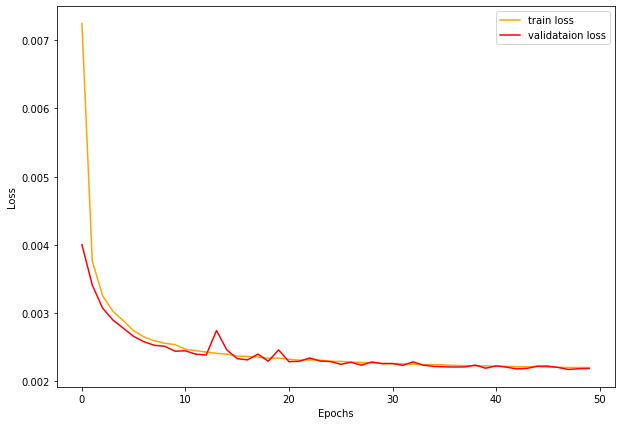

Saving the model--->


In [ ]:
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split
import numpy as np

#Function to convert tensors to images
# 1st parameter indicates batch size, 2nd parameter indicates image channels, 3rd and 4th parameter indicates image hieght and width in pixel
def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

# Defining the output folder for the images to be saved
image_dir = '/content/outputs/saved_images'
os.makedirs(image_dir, exist_ok=True)

#If available use cuda/gpu for faster computation
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print("We are using: {}".format(device))

#Defining the batch size
batch_size = 1
epochs = 50

#Defining the path of the blured images and sorting the images
gauss_blur = os.listdir('/content/input/gaussian_blurred')
gauss_blur.sort()

#Defining the path of the sharp images and sorting the images
sharp = os.listdir('/content/input/sharp')
sharp.sort()

#Adding all the blured images to x_blur_images list
x_blur_images = []
for i in range(len(gauss_blur)):
    x_blur_images.append(gauss_blur[i])

#Adding all the sharp images to y_sharp_images list
y_sharp_images = []
for i in range(len(sharp)):
    y_sharp_images.append(sharp[i])

#Training Testing Split with test size of 30%
(x_train, x_val, y_train, y_val) = train_test_split(x_blur_images, y_sharp_images, test_size=0.30)
print(f"Train data size: {len(x_train)}")
print(f"Validation data size: {len(x_val)}")

# defining transforms/properties of the tensor
# 1st we convert the image to PIL format
# 2nd Resize the image as 224 x 224
# 3rd convert the images to tensor
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Defining the DeblurDataset class where it will take the paths of blured images,sharp images and the predefined tensor transforms
# Then we have defined the magic method of len to give us the length of the blured images list
# Next we have implemented the magic method getter for applying the transforms to the images and getting the images
class DeblurDataset(Dataset):
    def __init__(self, blur_paths, sharp_paths=None, transforms=None):
        self.X = blur_paths
        self.y = sharp_paths
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        blur_image = cv2.imread(f"/content/input/gaussian_blurred/{self.X[i]}")
        
        if self.transforms:
            blur_image = self.transforms(blur_image)
            
        if self.y is not None:
            sharp_image = cv2.imread(f"/content/input/sharp/{self.y[i]}")
            sharp_image = self.transforms(sharp_image)
            return (blur_image, sharp_image)
        else:
            return blur_image

# Loading our train/test data with the DeblurDataset class
train_data = DeblurDataset(x_train, y_train, transform)
val_data = DeblurDataset(x_val, y_val, transform)

# For parallal computation and computation efficiency we are using the DataLoader Class from pytorch 
trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# The main core of debluring
# 1st of all we need to use the super constructor because further in the code we have used the "to" method of pytorch
# Then in the next 3 lines we have defined the convolutin layer with the input-output network layer, filter/feature detector/kernel size, and padding
# Then we have used the rectifier function aslo called as relu as our activation function
# Importent thing to note that in the last layer where we will be getting our output we shouldn't use any actication function
class DeblurCNN(nn.Module):
    def __init__(self):
        super(DeblurCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=9, padding=2)
        self.conv2 = nn.Conv2d(64, 32, kernel_size=1, padding=2)
        self.conv3 = nn.Conv2d(32, 3, kernel_size=5, padding=2)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        return x

# Here we have defined the model and transfered the model to our device (CPU or GPU) which one is available on our device 
model = DeblurCNN().to(device)
print(model)

# Creating the loss function with Mean Squared Error Loss
loss_function = nn.MSELoss()

# Defining the weights optimizer. We are using Adam because it is the most efficient optimizer.
# Also we have defined the learning rate for the model.
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# adjusting the learning rate dynamically
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau( 
        optimizer,
        mode='min',
        patience=5,
        factor=0.5,
        verbose=True
    )

# Here we have defined the train function for fitting the model. This function takes 3 parameters.
def train(model, dataloader, epoch):
    model.train()
    running_loss = 0.0

    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):

        blur_image = data[0]
        sharp_image = data[1]

        blur_image = blur_image.to(device)
        sharp_image = sharp_image.to(device)
        optimizer.zero_grad()

        outputs = model(blur_image)
        loss = loss_function(outputs, sharp_image)
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss/len(dataloader.dataset)

    print(f"\nTrain Loss: {train_loss:.5f}")
    
    return train_loss

#Validating the model
def validate(model, dataloader, epoch):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            blur_image = data[0]
            sharp_image = data[1]

            blur_image = blur_image.to(device)
            sharp_image = sharp_image.to(device)
            outputs = model(blur_image)
            loss = loss_function(outputs, sharp_image)
            running_loss += loss.item()

            if epoch == 0 and i == int((len(val_data)/dataloader.batch_size)-1):
                save_decoded_image(sharp_image.cpu().data, name=f"/content/outputs/saved_images/sharp{epoch}.jpg")
                save_decoded_image(blur_image.cpu().data, name=f"/content/outputs/saved_images/blur{epoch}.jpg")
            if i == int((len(val_data)/dataloader.batch_size)-1):
                save_decoded_image(outputs.cpu().data, name=f"/content/outputs/saved_images/val_deblurred{epoch}.jpg")

        val_loss = running_loss/len(dataloader.dataset)
        print(f"\nVal Loss: {val_loss:.5f}")
        return val_loss

train_loss  = []
val_loss = []

start = time.time()

#Training the model with defined epoch number
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss = train(model, trainloader, epoch)
    val_epoch_loss = validate(model, valloader, epoch)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    scheduler.step(val_epoch_loss)
end = time.time()

print(f"Took {((end-start)/60):.3f} minutes to train")

# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/model_plot/loss.png')
plt.show()

# save the model
print('Saving the model--->')
torch.save(model.state_dict(), '/content/gdrive/MyDrive/model_plot/model.pth')

Structural Similarity Measure: 0.7534794188302739
Sharpness: 6.804742466871108
Structural Similarity Measure: 0.797190461995644
Sharpness: 7.154088022699026
Structural Similarity Measure: 0.8180138470870134
Sharpness: 7.624821829216857
Structural Similarity Measure: 0.8197114607910784
Sharpness: 8.006502958376771
Structural Similarity Measure: 0.8229323405421726
Sharpness: 8.21195679134607
Structural Similarity Measure: 0.8266158158475169
Sharpness: 7.996697484461689
Structural Similarity Measure: 0.8260875619868532
Sharpness: 8.389330625171006
Structural Similarity Measure: 0.8261359977935023
Sharpness: 8.152967632786089
Structural Similarity Measure: 0.8301911952863827
Sharpness: 8.191893752081578
Structural Similarity Measure: 0.8307547122132063
Sharpness: 8.417864116115082
Structural Similarity Measure: 0.8335727181658773
Sharpness: 8.407801243122123
Structural Similarity Measure: 0.8329435168235647
Sharpness: 8.518319687237755
Structural Similarity Measure: 0.8350209957722098
Shar

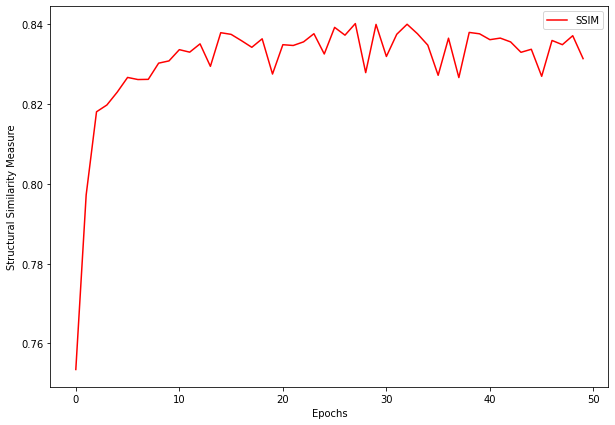

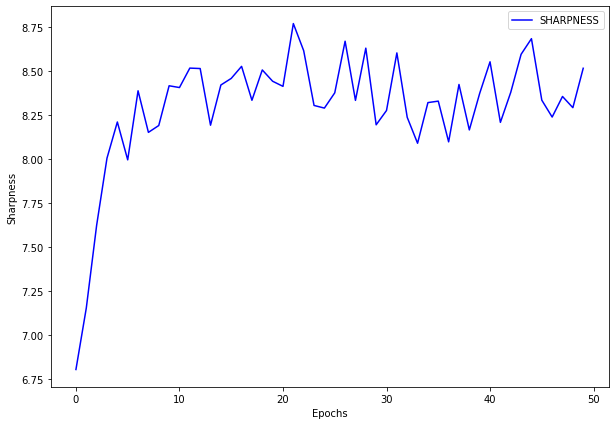

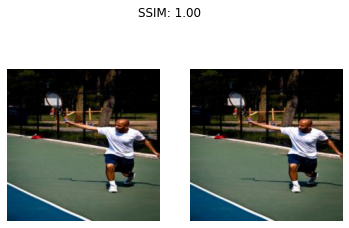

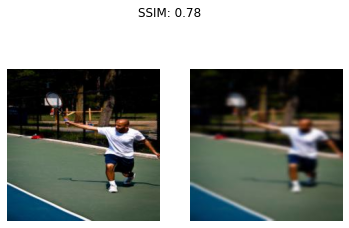

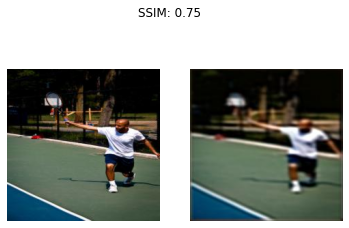

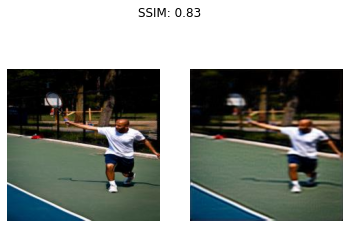

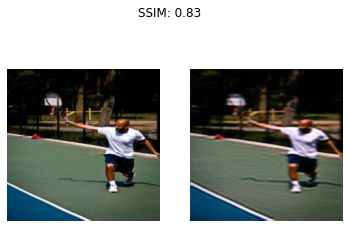

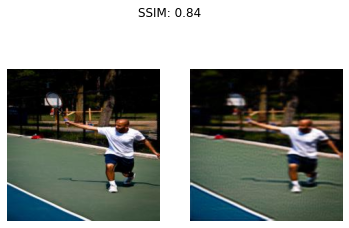

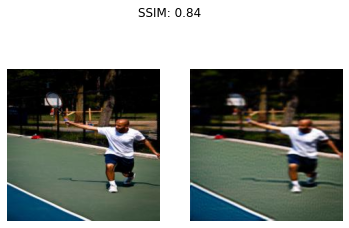

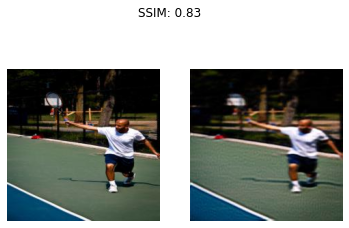

In [ ]:
# import the necessary packages for ssim calculation
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import cv2
import numpy as np

def compare_image_ssim(sharpImage, blurImage):
  compared_value = ssim(sharpImage, blurImage, multichannel=True)
  print(f"Structural Similarity Measure: {compared_value}")
  return(compared_value)

ssim_list = []
sharpness_list = []

for i in range(epochs):
	sharp_image = cv2.imread(f"/content/outputs/saved_images/sharp0.jpg")
	blurred_image = cv2.imread(f"/content/outputs/saved_images/val_deblurred{i}.jpg")

	s = compare_image_ssim(sharp_image,blurred_image)
	ssim_list.append(s)

 	#Sharpness Calculation
	img_sharpness = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
	array = np.asarray(img_sharpness, dtype=np.int32)
	gy, gx = np.gradient(array)
	gnorm = np.sqrt(gx**2 + gy**2)
	sharpness = np.average(gnorm)
	print("Sharpness: {}".format(sharpness))
	sharpness_list.append(sharpness)

plt.figure(figsize=(10, 7))
plt.plot(ssim_list, color='red', label='SSIM')
plt.xlabel('Epochs')
plt.ylabel('Structural Similarity Measure')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/model_plot/similarity_measure.png')
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(sharpness_list, color='blue', label='SHARPNESS')
plt.xlabel('Epochs')
plt.ylabel('Sharpness')
plt.legend()
plt.savefig('/content/gdrive/MyDrive/model_plot/sharpness_measure.png')
plt.show()

def compare_images(imageA, imageB, title):
    s = ssim(imageA, imageB, multichannel=True)
    fig = plt.figure(title)
    plt.suptitle("SSIM: %.2f" % (s))
  
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    plt.savefig(f'/content/gdrive/MyDrive/model_plot/{title}.png')
    plt.show()

original = cv2.imread("/content/outputs/saved_images/sharp0.jpg")
blur0 = cv2.imread("/content/outputs/saved_images/blur0.jpg")
compare_images(original, original,"Original vs Original")
compare_images(original, blur0,"Original vs Fully Blurred")

for i in range(0,51,10):
  if i==0:
    blurred = cv2.imread(f"/content/outputs/saved_images/val_deblurred{i}.jpg")
    compare_images(original, blurred,f"Original vs Trained After Epoch {i}")
  else:
    i = i-1
    blurred = cv2.imread(f"/content/outputs/saved_images/val_deblurred{i}.jpg")
    compare_images(original, blurred,f"Original vs Trained After Epoch {i}")
